# Human Activity Recognition

In [1]:
# import the standard libraries
import pandas as pd #Data processing and I/O operation
import numpy as np #Linear Algebra
import matplotlib.pyplot as plt

%matplotlib inline

#Import the machine libraries
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Import the Dataset

In [8]:
train = shuffle(pd.read_csv(r"C:\Users\Wolf\Downloads\Case Studies-20201127T143951Z-001\Case Studies\Additional Solved Projects\Human behaviour project\train.csv"))
test = shuffle(pd.read_csv(r"C:\Users\Wolf\Downloads\Case Studies-20201127T143951Z-001\Case Studies\Additional Solved Projects\Human behaviour project\test.csv"))

In [9]:
train.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
6521,0.281759,-0.017048,-0.106492,-0.981447,-0.956505,-0.957773,-0.982940,-0.952128,-0.963739,-0.918426,...,-0.331197,0.499096,-0.310336,0.599864,-0.797225,0.757552,0.215810,0.990177,28,LAYING
5475,0.272093,-0.024769,-0.088610,-0.950890,-0.891110,-0.875111,-0.965547,-0.888785,-0.859805,-0.850949,...,-0.627736,-0.011184,-0.317673,-0.565475,0.705020,-0.824616,0.146173,-0.098958,26,STANDING
1149,0.323698,-0.039466,-0.104092,-0.090252,0.100840,-0.437074,-0.126709,0.029348,-0.413807,0.149050,...,-0.785596,-0.624055,-0.749893,-0.975895,-0.720731,-0.680649,0.316962,0.046287,6,WALKING_UPSTAIRS
6433,0.205822,-0.054516,-0.133949,-0.321272,-0.334716,-0.263363,-0.387430,-0.408525,-0.347563,-0.112719,...,-0.621791,0.147064,0.219786,0.880636,-0.842844,-0.596630,0.308331,0.202689,28,WALKING_UPSTAIRS
1441,0.367262,-0.041283,-0.110820,0.266781,-0.094459,0.253409,0.191949,-0.072940,0.280505,0.624140,...,-0.808814,-0.646991,-0.735035,-0.854055,-0.886867,-0.695491,0.163304,0.226496,7,WALKING_DOWNSTAIRS
980,0.315171,-0.025933,-0.094480,-0.011488,0.352111,-0.369481,-0.081984,0.387421,-0.335811,0.181084,...,0.024813,-0.643448,0.431826,-0.640489,-0.358386,-0.692178,0.308709,0.048030,5,WALKING_UPSTAIRS
2392,0.268790,-0.021046,-0.119030,-0.976244,-0.929991,-0.903428,-0.979034,-0.928028,-0.905847,-0.917713,...,-0.813543,0.003006,-0.425293,0.266214,0.584141,-0.573495,0.260860,0.269162,14,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
809,0.350305,-0.050405,-0.137921,0.090909,0.032110,-0.275826,0.036947,-0.046338,-0.216245,0.500089,...,-0.592205,-0.391327,-0.378072,0.951982,-0.839683,-0.967516,0.091258,-0.007051,5,WALKING_DOWNSTAIRS
1230,0.292104,-0.017130,-0.136755,-0.987469,-0.981470,-0.963488,-0.989754,-0.982489,-0.963481,-0.922877,...,-0.447556,0.063831,0.437027,0.393969,-0.703441,0.601924,-0.940447,-0.048973,6,LAYING


In [10]:
train.tail(1)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
6642,0.282672,-0.058369,-0.166825,-0.98044,-0.848483,-0.898052,-0.986289,-0.829429,-0.882769,-0.900349,...,0.237683,0.014769,0.129238,-0.35242,-0.022525,-0.943854,0.084822,-0.022861,29,STANDING


In [11]:
train.shape

(7352, 563)

In [12]:
test.shape

(2947, 563)

### Check for missing values

In [13]:
print('Any missing value in training set:', train.isnull().values.any())
print('Any missing value in training set:', test.isnull().values.any())

Any missing value in training set: False
Any missing value in training set: False


### Exploring the Dataset

In [14]:
train_outcome = pd.crosstab(index = train['Activity'], columns='Count')
train_outcome

col_0,Count
Activity,
LAYING,1407
SITTING,1286
STANDING,1374
WALKING,1226
WALKING_DOWNSTAIRS,986
WALKING_UPSTAIRS,1073


### Exploratory Data Analysis

In [15]:
temp = train['Activity'].value_counts()
temp

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [16]:
df = pd.DataFrame({'labels':temp.index, 'values':temp.values})

In [17]:
df.head(2)

,labels,values
0,LAYING,1407
1,STANDING,1374


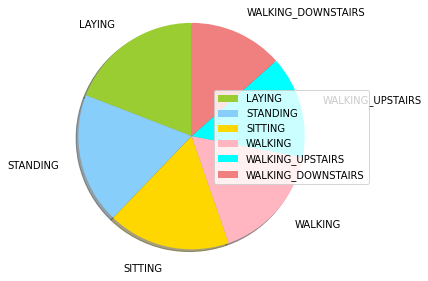

In [18]:
labels=df['labels']
sizes = df['values']
colors = ['yellowgreen', 'lightskyblue', 'gold', 'lightpink', 'cyan', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, labels = labels, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc='right')
plt.axis('equal')
plt.tight_layout()
plt.show()

### Data Processing

In [19]:
X_train = pd.DataFrame(train.drop(['Activity', 'subject'], axis=1))
Y_train_label = train.Activity.values.astype(object)
X_test = pd.DataFrame(test.drop(['Activity', 'subject'], axis=1))
Y_test_label = test.Activity.values.astype(object)

In [20]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

encoder.fit(Y_train_label)
y_train = encoder.transform(Y_train_label)

In [21]:
y_train

array([0, 2, 5, ..., 2, 1, 2])

In [22]:
encoder.fit(Y_test_label)
y_test = encoder.transform(Y_test_label)

In [23]:
y_test

array([1, 1, 4, ..., 2, 4, 4])

In [24]:
num_cols = X_train._get_numeric_data().columns
num_cols.size

561

## Model Building for Human Acitivity Recognition

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

In [26]:
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=24)

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
print((accuracy_score(y_test, y_pred)*100), '%')

In [ ]:
scores = []
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

In [ ]:
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
xticks = range(1,50)
plt.plot(xticks, scores, color='red', linestyle='solid', marker='o', 
        markersize=5, markerfacecolor='blue')
plt.show()

In [ ]:
scores = np.array(scores)
print('Optimal number of neighbors is:', scores.argmax())
print('Accuracy Score:' +str(scores.max()*100),'%')

### Conclusion

In [ ]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred_label = list(encoder.inverse_transform(y_pred))

In [ ]:
y_pred_label

In [ ]:
print(confusion_matrix(Y_test_label, y_pred_label))

In [ ]:
print(classification_report(Y_test_label, y_pred_label))